In [119]:
import numpy as np
import matplotlib.pyplot as plt

import pfb
from constants import LBLOCK,NTAP,NCHAN

In [129]:
k=80
def simulate_quantization_error_weiner( delta=0.5 , n_sims = 100 , k=60 , weiner_thresh=0.1 ):
    # input param delta is the quantization step
    x_arr = [] # list of actual input timestream arrays
    x_ipfb_arr = [] # list of IPFB output arrays
    x_weiner_arr = [] # list of IPFB and weiner arrays
    for sim in range(n_sims):
        if sim==0:print("Simulation Number __ out of {}:".format(n_sims))
        if sim%1==0: print(sim,end=" ")
        x = np.random.normal(0,1,LBLOCK*k) 
        
        d = pfb.forward_pfb(x) 
        d = pfb.quantize_8_bit( d , np.sqrt(2*(d.shape[1] - 1)) * delta ) # quantize the pfb 
                
        x_ipfb = pfb.inverse_pfb(d) # inver the pfb
        x_weiner = pfb.inverse_pfb(d,weiner_thresh=weiner_thresh)
        
        # save the arrays
        x_arr.append(x) 
        x_ipfb_arr.append(x_ipfb) 
        x_weiner_arr.append(x_weiner)
        
    return np.array(x_arr), np.array(x_ipfb_arr), np.array(x_weiner_arr)

In [130]:
arr = np.array([[1,2,3,4],[5,6,7,8]])
arr.reshape((2,2,2))

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

Simulation Number __ out of 10:
0 1 2 3 4 5 6 7 8 9 Simulation Number __ out of 10:
0 1 2 3 4 5 6 7 8 9 

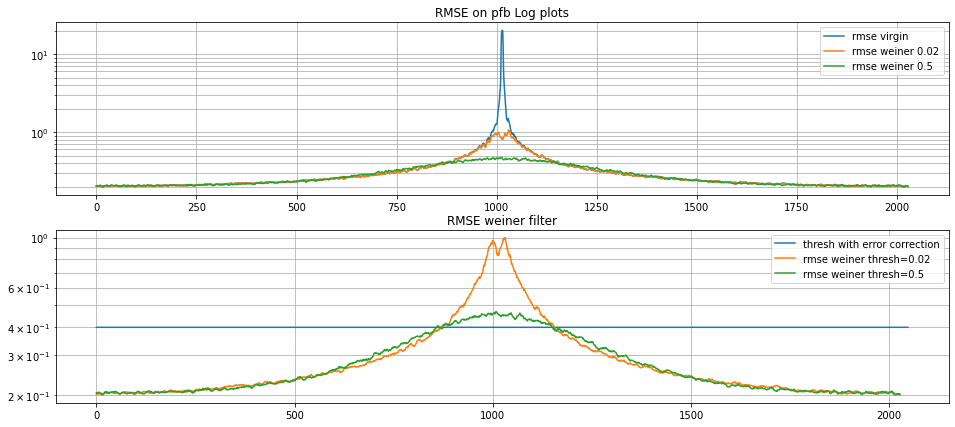

In [135]:
k = 80
n_sims = 10
weiner_thresh1 = 0.02
weiner_thresh2 = 0.5
x,y,z1 = simulate_quantization_error_weiner(n_sims=n_sims,k=k,weiner_thresh=weiner_thresh1)
x2,_,z2 = simulate_quantization_error_weiner(n_sims=n_sims,k=k,weiner_thresh=weiner_thresh2)

def get_rmse(se): # se stands for 'squared error'
    se = se[:,5*LBLOCK:-5*LBLOCK] # drop error prone edge-effects
    se = se.reshape((n_sims*(k-10),LBLOCK)) # reshape so that you just have a bunch of segments (blocks)
    rmse = np.sqrt(np.mean(se, axis=0)) # calculate the rmse
    return rmse

def mav(signal, num):
    block = np.array([np.concatenate([np.zeros(i),signal,np.zeros(num-i)]) for i in range(num)])
    return np.mean(block,axis=0)[num//2:-num//2]

# sev = np.real(x-y)**2 # squared error virgin
# sew = np.real(x-z)**2 # squared error weiner
# sev = sev[:,5*LBLOCK:-5*LBLOCK]
# sev = sev.reshape((n_sims*(k-10),LBLOCK))
# sew = sew[:,5*LBLOCK:-5*LBLOCK]
# sew = sew.reshape((n_sims*(k-10),LBLOCK))

# rmse_virgin = np.sqrt(np.mean(sev, axis=0))
# rmse_weiner = np.sqrt(np.mean(sew, axis=0))

rmse_virgin = get_rmse(np.real(x-y)**2)
rmse_weiner1 = get_rmse(np.real(x-z1)**2)
rmse_weiner2 = get_rmse(np.real(x2-z2)**2)


plt.subplots(figsize=(16,7))
plt.subplot(211)
plt.title("RMSE on pfb Log plots")
plt.semilogy(mav(rmse_virgin,5)[10:-10],label="rmse virgin")
plt.semilogy(mav(rmse_weiner1,5)[10:-10],label="rmse weiner {}".format(weiner_thresh1))
plt.semilogy(mav(rmse_weiner2,5)[10:-10],label="rmse weiner {}".format(weiner_thresh2))
plt.grid(which="both")
plt.legend()

plt.subplot(212)
plt.title("RMSE weiner filter")
plt.semilogy(np.ones(LBLOCK)*0.4, label="thresh with error correction")
plt.semilogy(mav(rmse_weiner1,10)[10:-10],label="rmse weiner thresh={}".format(weiner_thresh1))
plt.semilogy(mav(rmse_weiner2,10)[10:-10],label="rmse weiner thresh={}".format(weiner_thresh2))
plt.grid(which="both")
plt.legend()

plt.show()

In [110]:
def mav(signal, num):
    block = np.array([np.concatenate([np.zeros(i),signal,np.zeros(num-i)]) for i in range(num)])
    return np.mean(block,axis=0)[num//2:-num//2]

In [111]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

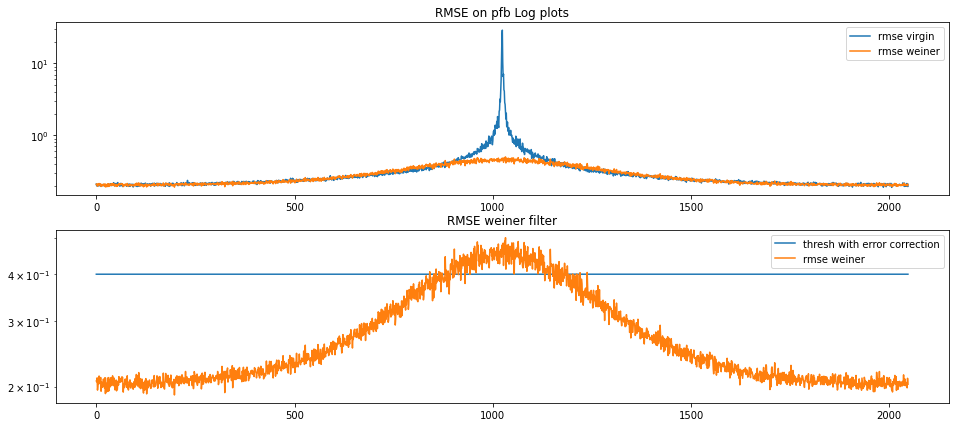

In [112]:
plt.subplots(figsize=(16,7))
plt.subplot(211)
plt.title("RMSE on pfb Log plots")
plt.semilogy(rmse_virgin,label="rmse virgin")
plt.semilogy(rmse_weiner,label="rmse weiner")
plt.legend()

plt.subplot(212)
plt.title("RMSE weiner filter")
plt.semilogy(np.ones(LBLOCK)*0.4, label="thresh with error correction")
plt.semilogy(rmse_weiner,label="rmse weiner")
plt.legend()

plt.show()

In [36]:
x.shape, y.shape,z.shape,sev.shape,sew.shape

((10, 163840), (10, 163840), (10, 163840), (10, 70, 2048), (10, 70, 2048))

In [24]:
rmse_virgin = np.sqrt(np.mean((y - x)**2, axis=0))
rmse_weiner = np.sqrt(np.mean((z - x)**2, axis=0))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part


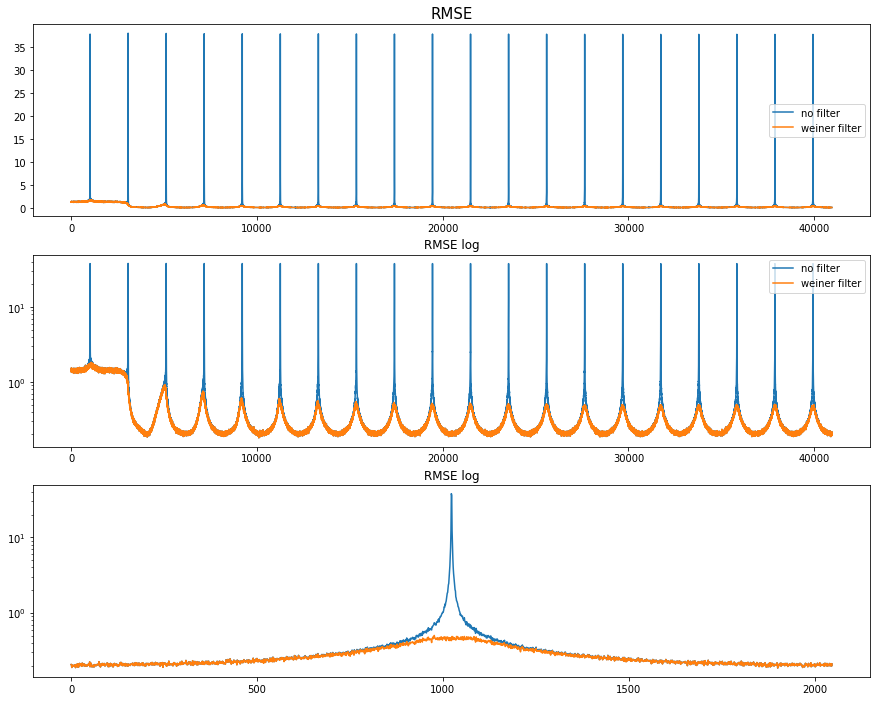

In [26]:
plt.subplots(figsize=(15,12))
plt.subplot(311)
plt.plot(rmse_virgin[:20*LBLOCK],label="no filter")
plt.plot(rmse_weiner[:20*LBLOCK],label="weiner filter")
plt.legend()
plt.title("RMSE",fontsize=15)

plt.subplot(312)
plt.semilogy(rmse_virgin[:20*LBLOCK],label="no filter")
plt.semilogy(rmse_weiner[:20*LBLOCK],label="weiner filter")
plt.legend()
plt.title("RMSE log")

plt.subplot(313)
plt.semilogy(rmse_virgin[20*LBLOCK:21*LBLOCK],label="no filter")
plt.semilogy(rmse_weiner[20*LBLOCK:21*LBLOCK],label="weiner filter")
plt.title("RMSE log")

plt.show()

